# [Goulib](../notebook.ipynb).image
image processing made easy



In [1]:
from Goulib.notebook import *
from Goulib.image import *

lena_original=Image('../tests/data/lena.png') #Image can be init'ed from a path

In [2]:
# all PIL functions and methods are available
size=(128,128)
lena=lena_original.resize(size)
lena_gray=lena.grayscale()

## Rendering


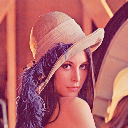

In [3]:
print(lena) #images have a default HTML representation


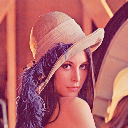
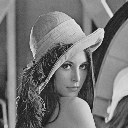

In [4]:
from Goulib.notebook import *
print(lena,"lena",lena_gray,"lena gray") # yes, notebook.print function can display Images

Lena,Gray,R,G,B,Negative
,,,,,

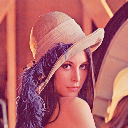
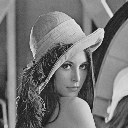
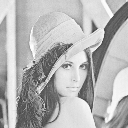
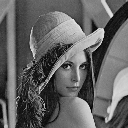
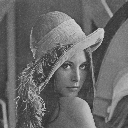
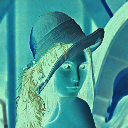

In [5]:
lena_neg=-lena #some PIL.ImageOps are implemented as methods and operators
lena_rgb=lena.split() # split in RGB bands
images=[lena,lena_gray,lena_rgb[0],lena_rgb[1],lena_rgb[2],lena_neg]

from Goulib.table import Table
Table([images],titles=['Lena','Gray','R','G','B','Negative']) # images can also be put in tables

## Color separation

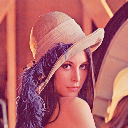

In [6]:
Image(lena_rgb) # merge several graylevel in one, in RGB(A) mode by default

Cyan,Magenta,Yellow,blacK
,,,
,,,

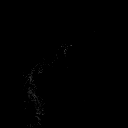
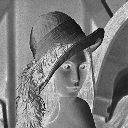
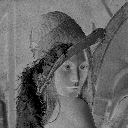
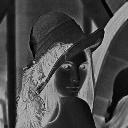
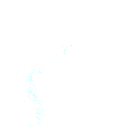
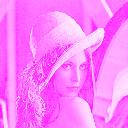
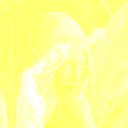
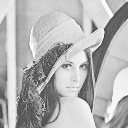

In [7]:
colors=['Cyan','Magenta','Yellow','blacK']
cmyk=lena.split('CMYK') # converts from RGB to CMYK under the hood
cmyk2=[im*col for im,col in zip(cmyk,colors)] # multiply a graylevel image by a color to colorize it !
Table([cmyk,cmyk2],titles=colors)

#note : CMYK are "substractive" colors, so each channel looks inverted until multiplied by the corresponding color
#note also that lena has very low pure Cyan content

In [8]:
sum(cmyk2,Image()) #Image() is needed as initial empty element

ValueError: Images of type float must be between -1 and 1.

ValueError: Images of type float must be between -1 and 1.

Image(mode=RGB size=(128, 128))

In [10]:
lab=lena.convert('Lab')
lab

KeyError: 'Lab'

## Dithering


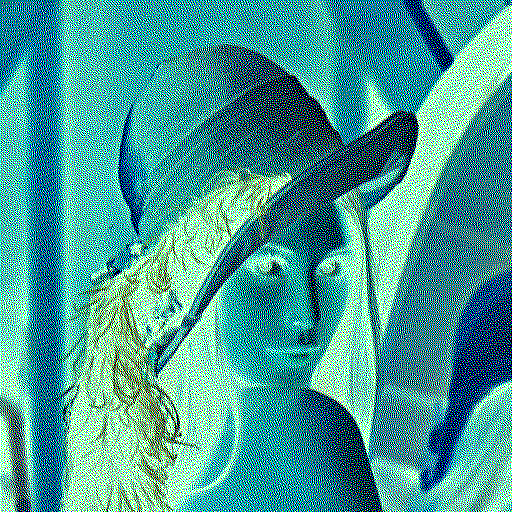

AttributeError: 'Image' object has no attribute 'thumbnail'

In [15]:
lena_dither=lena_original.dither() # applies automatically to RGB planes
print(lena_dither,'1 bit CMYK dithering')
lena_dither.thumbnail((256,256))
images.append(lena_dither) # for hash and distance below
lena_dither

## Hash and Distances

"Image.average_hash" is implemented as [described here](http://www.hackerfactor.com/blog/index.php?/archives/432-Looks-Like-It.html)

this hash is independent of image mode or size, which makes it perfect for finding duplicates in hudge images collections

moreover, it can be used to compute "distance" between images very quickly:

Lena,Gray,R,G,B,Negative
,,,,,
2206374220586495537,2206374220586495537,2215416603676969489,476991961528741425,440258996031663656,4711154807054586323
0,0,0.22,0.09,0.31,2.00

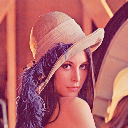
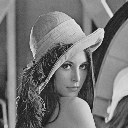
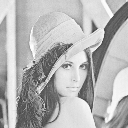
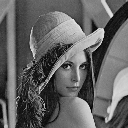
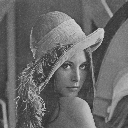
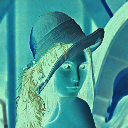

In [14]:
hashes=list(map(hash,images))
dist=[im.dist(lena) for im in images]
Table([images,hashes,dist],titles=['Lena','Gray','R','G','B','Negative']) # images can also be put in tables

notice that a distance of 1 means "totally different" while a distance of 2 means "inverted

dist(lena,lena_dither) is very small, showing very little sensitivity to quantization

## Canvas and geometric transformations

In [ ]:
images=[
    lena.expand((150,150)),       # centered by default
    lena.expand((150,150),5,20),  # dx,dy offset
    lena.expand((150,150),-1,-5), # negative offsets wr to lower right
    lena.expand((150,150),None,0),#centered in X, offset in Y
    lena.expand((150,150),-1,None),#centered in Y, offset in X
    lena.expand((150,150),0,0).shift(3.25,2.5) #and we can do SUBPIXEL shifts !!!
]
Table([images])
    

In [ ]:
images=[
    lena.expand((130,130),1,1), # 1 pixel border
    lena.expand((129,129),0.5,0.5) #  half pixel border ... can you see the difference?
    ]
Table([images])

## Slices, composition

In [ ]:
face=lena_original[246:374,225:353] # images can be sliced . Note the first coordinate is Y, then X
face

In [ ]:
eye=face[3:35,-35:-3] # negative indexes are handy in some cases
eye.scale(4)

In [ ]:
left=lena_original[:,0:256]
right=lena_original[:,256:]
stitched=Image(size=(513,513),mode='RGB',color='white')
stitched.add(left,(0,0))
stitched.add(right.shift(1,0),(256,0))
stitched

## Correlation

In [ ]:
face.grayscale().correlation(eye.grayscale())

## Image Creation

In [ ]:
# Image can be created from standard Python lists and iterators, which are automatically normalized
# colormaps can be used to generate color images
from matplotlib import cm
a=[[-x*x+y*y for x in range(128)] for y in range(128)]
Table([[Image(a),Image(a,colormap=cm.spectral)]])

In [ ]:
mask=disk(64)
Table([[lena+mask,lena-mask,lena*mask]])

## Filtering
gray level filters are automatically applied to RGB color planes and results re-merged in a color image

In [ ]:
from PIL.ImageFilter import *
pilfilters=[BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE, EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN]
lena_filtered=[lena.filter(f) for f in pilfilters]
from Goulib.itertools2 import reshape
Table(reshape(lena_filtered,(0,5))) # nice way to limit table width, isn't it ?

In [ ]:
R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = lena_rgb[R].point(lambda i: 0 if i < 100 else 255)

# process the green band
out = lena_rgb[G].point(lambda i: i * 0.1)

# paste the processed band back, but only where red was < 100
lena_rgb[R].paste(out, None, mask)

# build a new multiband image
Image(lena_rgb)

## scikit-image
advanced image processing thanks to http://scikit-image.org/

In [ ]:
# filtering function can be passed directly to Image.filter method, and (RGB) channels are handled automatically
from skimage.filters import *
from skimage.restoration import denoise_bilateral
#demo with all filters that need no extra parameter
skifilters=[ sobel, sobel_h, sobel_v,
            prewitt, prewitt_h, prewitt_v,
            scharr, scharr_h, scharr_v,
            roberts, roberts_neg_diag, roberts_pos_diag,
            denoise_bilateral, ]
lena_filtered=[lena.filter(f) for f in skifilters]
Table(reshape(lena_filtered,(0,6)))

In [ ]:
# the following filters need extra parameters:
from skimage.filters import LPIFilter2D, gabor_filter, gaussian_filter, median, rank_order, wiener
from skimage.filters import threshold_adaptive, threshold_isodata, threshold_li, threshold_otsu, threshold_yen
from skimage.feature import canny
from skimage.restoration import denoise_tv_bregman, denoise_tv_chambolle

In [ ]:
dir(skimage)